In [148]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#### 날코딩 딥러닝

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings # 경고 메시지 띄우기 모듈 
warnings.filterwarnings('ignore') # 경고 메시지 숨기기

## Overview the Data Set

(64, 64)


(-0.5, 63.5, 63.5, -0.5)

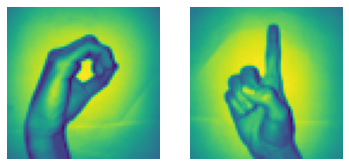

In [150]:
#data load (이미지 불러오기)
x_1 = np.load('X.npy')
y_1 = np.load('Y.npy')
img_size = 64

print(x_1[260].shape)
# print(len(x_1[260]))
plt.subplot(1,2,1)
plt.imshow(x_1[260].reshape(img_size,img_size)) ## 64행 64열로 이미지 사이즈 조정
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(x_1[900].reshape(img_size,img_size))
plt.axis('off')

In [151]:
## 데이터 전처리 ##
X = np.concatenate((x_1[204:409], x_1[822:1027]), axis=0)
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (410, 64, 64)
Y shape: (410, 1)


In [152]:
# train, test set 만들기(85:15)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.15,random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
print(number_of_train , number_of_test, number_of_train + number_of_test)

348 62 410


In [153]:
# 차원을 변경 (3차원배열 > 1차원(행렬))
X_train_flattern = X_train.reshape(number_of_train, X_train.shape[1]*X_train.shape[2])
X_test_flattern = X_test.reshape(number_of_test, X_test.shape[1]*X_test.shape[2])

print(X_train_flattern.shape, X_test_flattern.shape)

(348, 4096) (62, 4096)


In [154]:
# 행렬을 전치
x_train = X_train_flattern.T
x_test = X_test_flattern.T
y_train = Y_train.T
y_test = Y_test.T

## logistic Regression
https://slack-files.com/T01U83TG2Q3-F022BQ1P7PA-d7a7ba0705

In [155]:
def dummy(parameter):
    dummy_parameter = parameter+5
    return dummy_parameter
result = dummy(3)

# np.full(4096, 0.01)
def initialize_weights_and_bias(dimension):
    w = np.full((dimension, 1), 0.01)
    b = .0
    return w, b

In [156]:
# print(np.exp(2))
# print(np.e**(2))
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [157]:
sigmoid(100)

1.0

In [158]:
## 곱하는값 w, 더하는값 b을 주고 activation함수 처리하도록 하는 함수(포워드프로파) 지정
def forward_propagation(w, b, x_train, y_train):
    z = np.dot(w.T, x_train) + b # 곱하는값 w, 더하는값 b ## numpy.dot은 내적을 구하는 함수(=두 행렬의 곱)
    y_head = sigmoid(z) # 활성화함수: 시그모이드
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head) #오차값(loss) 미분계수 (교차엔트로피)
    cost = np.sum(loss)/x_train.shape[1] # (= 잔차 합)
    return cost

In [159]:
w, b = initialize_weights_and_bias(4096)
cost = forward_propagation(w, b, x_train, y_train)
print(cost)

14.014222401929988


## gradient descent

In [160]:
## 오차를 구해서 w값과 b값을 조정하는 과정 (BACKPROPAGATION)
def forward_backward_propagation(w, b, x_train, y_train):
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = np.sum(loss)/x_train.shape[1]
    
    #backward propagation  #optimizing
    derivative_weight = np.dot(x_train,((y_head - y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head - y_train)/x_train.shape[1]
    gradients = {"derivative_weight":derivative_weight, "derivative_bias":derivative_bias}
    return cost, gradients

In [161]:
w, b = initialize_weights_and_bias(4096)
cost, derivative_dict = forward_backward_propagation(w, b, x_train, y_train)
print(derivative_dict['derivative_weight'])

[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]


In [162]:
## epochs 2회차 ##
w = derivative_dict['derivative_weight']
b = derivative_dict['derivative_bias']
print(w, b)
# cost, derivative_dict = forward_backward_propagation(w, b, x_train, y_train)
# print(derivative_dict['derivative_weight'])
# print(derivative_dict)

[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]] 0.4942528735619787


In [163]:
## 교수님 모범답안 ##
# Updating(learning) parameters
## epoch하는 코드
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion): 
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

Cost after iteration 0: nan
Cost after iteration 10: nan
Cost after iteration 20: nan
Cost after iteration 30: nan
Cost after iteration 40: nan
Cost after iteration 50: nan
Cost after iteration 60: nan
Cost after iteration 70: nan
Cost after iteration 80: nan
Cost after iteration 90: nan
Cost after iteration 100: nan
Cost after iteration 110: 4.874128
Cost after iteration 120: 1.821005
Cost after iteration 130: 1.732519
Cost after iteration 140: 1.638640
Cost after iteration 150: 1.543360
Cost after iteration 160: 1.435432
Cost after iteration 170: 1.308495
Cost after iteration 180: 1.161856
Cost after iteration 190: 0.996562


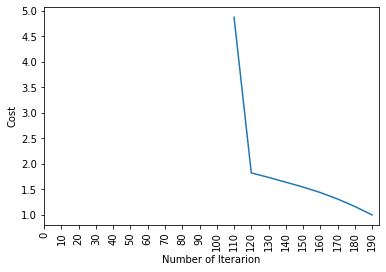

In [164]:
parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,
                                          number_of_iterarion = 200) # 학습률:0.009 , 업데이트반복횟수 200번

In [165]:
# prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
            
    return Y_prediction

In [166]:
predict(parameters["weight"],parameters["bias"],x_test)

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [167]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


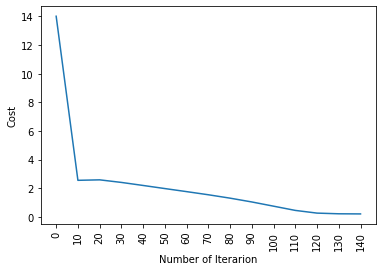

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [168]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

In [169]:
#sklearn 이용
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state=42, max_iter=150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
# print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 


**: 사이킷런에서 지원하는 리니어모델이 날코딩 모델보다 성능이 좋음을 확인할 수 있음**

**아래의 날코딩 모델보며 이해하기**

In [170]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

In [171]:
def forward_propagation_NN(x_train, parameters):
    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache

In [172]:
# Compute cost
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

In [173]:
# Backward Propagation
def backward_propagation_NN(parameters, cache, X, Y):
    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

In [174]:
# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    return parameters

In [175]:
# prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    return Y_prediction

Cost after iteration 0: 0.327184
Cost after iteration 100: 0.334426
Cost after iteration 200: 0.341052
Cost after iteration 300: 0.343536
Cost after iteration 400: 0.344457
Cost after iteration 500: 0.344807
Cost after iteration 600: 0.344960
Cost after iteration 700: 0.345045
Cost after iteration 800: 0.343622
Cost after iteration 900: 0.333849
Cost after iteration 1000: 0.326035
Cost after iteration 1100: 0.301585
Cost after iteration 1200: 0.263625
Cost after iteration 1300: 0.223612
Cost after iteration 1400: 0.189476
Cost after iteration 1500: 0.323328
Cost after iteration 1600: 0.142189
Cost after iteration 1700: 0.124528
Cost after iteration 1800: 0.110134
Cost after iteration 1900: 0.098420
Cost after iteration 2000: 0.088901
Cost after iteration 2100: 0.081065
Cost after iteration 2200: 0.074422
Cost after iteration 2300: 0.068504
Cost after iteration 2400: 0.062975


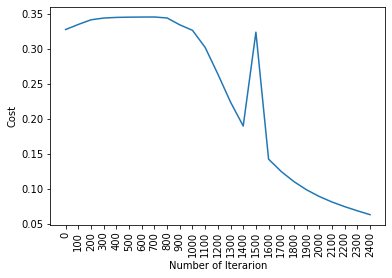

train accuracy: 98.85057471264368 %
test accuracy: 93.54838709677419 %


In [176]:
# 2 - Layer neural network (2중 레이어 딥러닝 모델)
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)
    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters
parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

In [178]:
#reshaping
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

In [179]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4888
Epoch 2/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5448
Epoch 3/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.5168
Epoch 4/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5810
Epoch 5/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5364
Epoch 6/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5434
Epoch 7/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.5581
Epoch 8/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.5388
Epoch 9/100
8/8 [==============================] - 0s 997us/step - loss: 0.6750 - accuracy: 0.5602
Epoch 10/100
8/8 [==============================] - 0s 997us/step - loss: 0.6693 - accuracy: 0.5364
Epoch 11/100
8/8 [=======

8/8 [==============================] - 0s 997us/step - loss: 0.0858 - accuracy: 0.9728
Epoch 84/100
8/8 [==============================] - 0s 997us/step - loss: 0.0949 - accuracy: 0.9607
Epoch 85/100
8/8 [==============================] - 0s 1ms/step - loss: 0.0794 - accuracy: 0.9781
Epoch 86/100
8/8 [==============================] - 0s 1ms/step - loss: 0.1018 - accuracy: 0.9534
Epoch 87/100
8/8 [==============================] - 0s 997us/step - loss: 0.0868 - accuracy: 0.9681
Epoch 88/100
8/8 [==============================] - 0s 997us/step - loss: 0.0821 - accuracy: 0.9755
Epoch 89/100
8/8 [==============================] - 0s 997us/step - loss: 0.0849 - accuracy: 0.9645
Epoch 90/100
8/8 [==============================] - 0s 998us/step - loss: 0.0538 - accuracy: 0.9908
Epoch 91/100
8/8 [==============================] - 0s 849us/step - loss: 0.0800 - accuracy: 0.9679
Epoch 92/100
8/8 [==============================] - 0s 997us/step - loss: 0.0769 - accuracy: 0.9710
Epoch 93/100
8/8 

Epoch 65/100
8/8 [==============================] - 0s 959us/step - loss: 0.3007 - accuracy: 0.9532
Epoch 66/100
8/8 [==============================] - 0s 997us/step - loss: 0.3070 - accuracy: 0.9872
Epoch 67/100
8/8 [==============================] - 0s 855us/step - loss: 0.2938 - accuracy: 0.9697
Epoch 68/100
8/8 [==============================] - 0s 1ms/step - loss: 0.2992 - accuracy: 0.9664
Epoch 69/100
8/8 [==============================] - 0s 997us/step - loss: 0.2813 - accuracy: 0.9802
Epoch 70/100
8/8 [==============================] - 0s 855us/step - loss: 0.2821 - accuracy: 0.9895
Epoch 71/100
8/8 [==============================] - 0s 1ms/step - loss: 0.2996 - accuracy: 0.9725
Epoch 72/100
8/8 [==============================] - 0s 997us/step - loss: 0.2914 - accuracy: 0.9719
Epoch 73/100
8/8 [==============================] - 0s 997us/step - loss: 0.3061 - accuracy: 0.9805
Epoch 74/100
8/8 [==============================] - 0s 1ms/step - loss: 0.2811 - accuracy: 0.9697
Epoch 

8/8 [==============================] - 0s 997us/step - loss: 0.1066 - accuracy: 0.9601
Epoch 47/100
8/8 [==============================] - 0s 1ms/step - loss: 0.1083 - accuracy: 0.9524
Epoch 48/100
8/8 [==============================] - 0s 1ms/step - loss: 0.1185 - accuracy: 0.9542
Epoch 49/100
8/8 [==============================] - 0s 997us/step - loss: 0.0968 - accuracy: 0.9609
Epoch 50/100
8/8 [==============================] - 0s 1ms/step - loss: 0.0929 - accuracy: 0.9708
Epoch 51/100
8/8 [==============================] - 0s 1ms/step - loss: 0.0814 - accuracy: 0.9720
Epoch 52/100
8/8 [==============================] - 0s 855us/step - loss: 0.1047 - accuracy: 0.9674
Epoch 53/100
8/8 [==============================] - 0s 1ms/step - loss: 0.0911 - accuracy: 0.9765
Epoch 54/100
8/8 [==============================] - 0s 1ms/step - loss: 0.0782 - accuracy: 0.9827
Epoch 55/100
8/8 [==============================] - 0s 1ms/step - loss: 0.0928 - accuracy: 0.9775
Epoch 56/100
8/8 [=========

실기과제

In [180]:
from tensorflow.keras import datasets, layers, models
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()